In [46]:
import json
import matplotlib.pyplot as plt

In [47]:
real_folder_name = "./data-json/iscx"
# fake_folder_name = "./data-json/netdiffusion"
fake_folder_name = "./result/iscx"

type_name = "skype"
real_name = real_folder_name + "/" + type_name + ".json"
fake_name = fake_folder_name + "/" + type_name + ".json"

In [ ]:
def extract_pkt_len(name):
    with open(name, 'r') as f:
        json_data = json.load(f)
    packet_lens = []
    for flow in json_data:
        flow_pkt = []
        sery = flow['series']
        for pkt in sery:
            # flow_pkt.append(max(0,min(pkt['time'],5000)))
            flow_pkt.append(pkt['ttl'])
        packet_lens.append(flow_pkt)
        
    return packet_lens

In [49]:
real_pkt_lens = extract_pkt_len(real_name)
fake_pkt_lens = extract_pkt_len(fake_name)

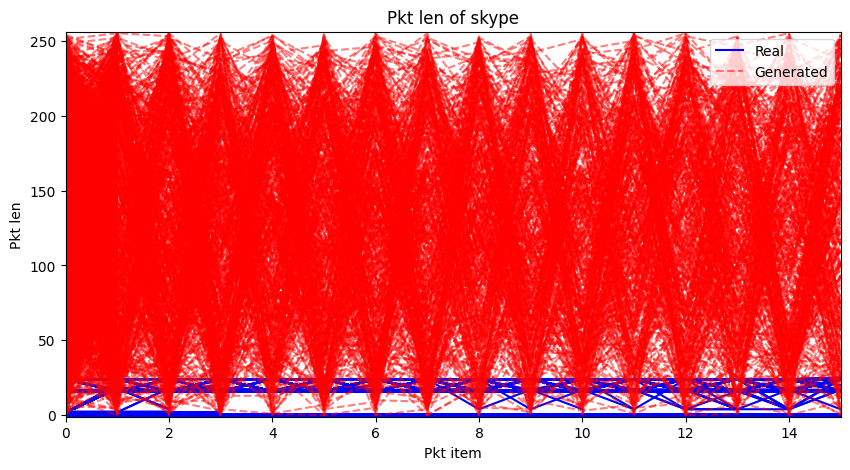

In [50]:
plt.figure(figsize=(10, 5))
plt.axis([0, 15, -1, 256])
for i in range(len(real_pkt_lens)):
    plt.plot(real_pkt_lens[i], color='blue', alpha=1.0, label="Real" if i == 0 else "")  # 使用蓝色，透明度为 0.6
for i in range(len(fake_pkt_lens)):
    plt.plot(fake_pkt_lens[i], color='red', alpha=0.5, linestyle='--', label="Generated" if i == 0 else "")
plt.title(f'Pkt len of {type_name}')
plt.xlabel('Pkt item')
plt.ylabel('Pkt len')
plt.legend()
plt.show()